# Titanic SVM

## 1. Importar librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import statistics as stat
from sklearn.model_selection import train_test_split

## 2. Cargar dataset

In [ ]:
df_titanic = pd.read_csv(
    "https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/dataset_titanic.csv")
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 3. Visualizar valores nulos en el dataset

In [ ]:
print("\nValores nulos totales: \n", df_titanic.isnull().sum())


Valores nulos totales: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 4. Graficando los datos

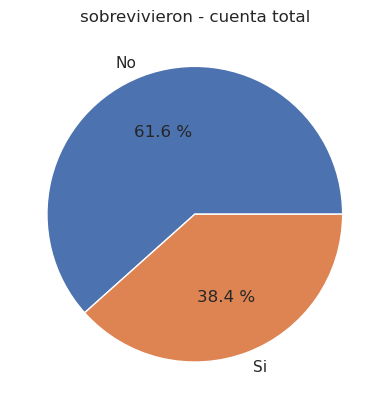

In [ ]:
datos = df_titanic.Survived.value_counts(normalize=True)
plt.pie(datos, labels=["No", "Si"], autopct="%0.1f %%")
plt.title("sobrevivieron - cuenta total")
plt.show()

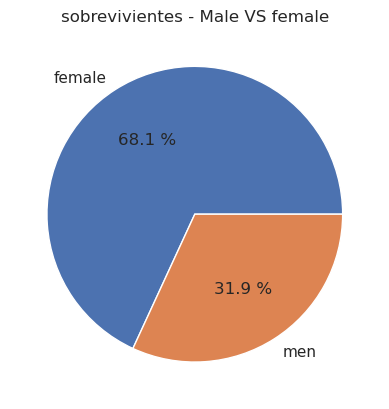

In [ ]:
plt.title("sobrevivientes - Male VS female")
datos = df_titanic.Sex[df_titanic.Survived == 1].value_counts(normalize=True)
plt.pie(datos, labels=["female", "men"], autopct="%0.1f %%")
plt.show()

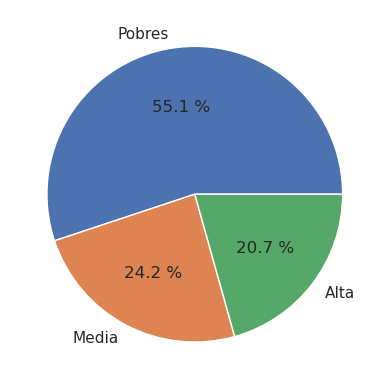

In [ ]:
datos = df_titanic.Pclass.value_counts(normalize=True)
plt.pie(datos, labels=["Pobres", "Media", "Alta"], autopct="%0.1f %%")
plt.show()

In [ ]:
df_new = df_titanic.dropna()
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

edades_primera_clase = np.array(df_new[df_new.Pclass == 1]['Age'])
edades_segunda_clase = np.array(df_new[df_new.Pclass == 2]['Age'])
edades_tercera_clase = np.array(df_new[df_new.Pclass == 3]['Age'])

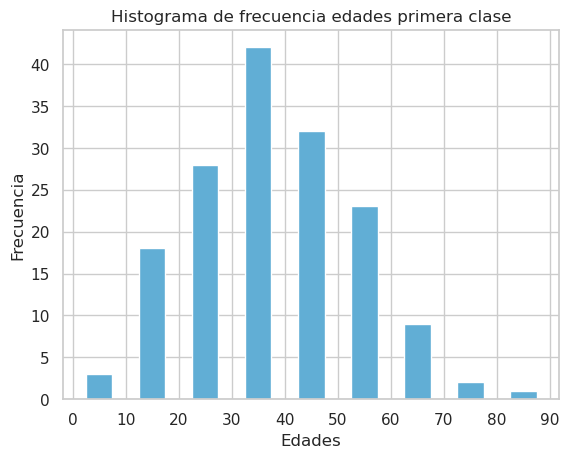

In [ ]:
plt.hist(x=edades_primera_clase, bins=intervalos, color='#61AED5', rwidth=0.5)
plt.title('Histograma de frecuencia edades primera clase')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

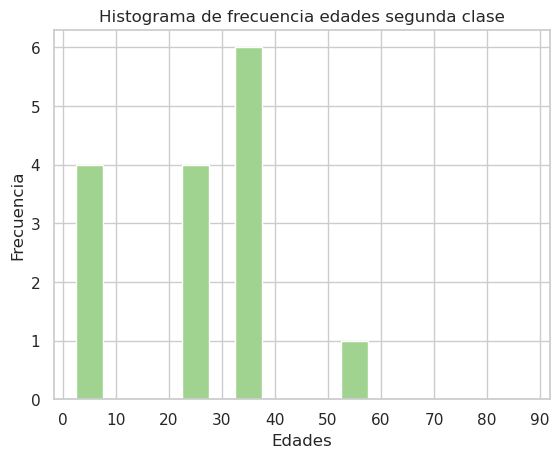

In [ ]:
plt.hist(x=edades_segunda_clase, bins=intervalos, color='#A1D390', rwidth=0.5)
plt.title('Histograma de frecuencia edades segunda clase')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

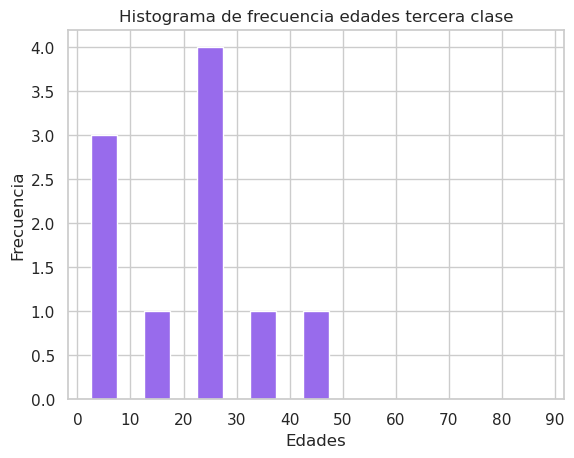

In [ ]:
plt.hist(x=edades_tercera_clase, bins=intervalos, color='#986BEC', rwidth=0.5)
plt.title('Histograma de frecuencia edades tercera clase')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

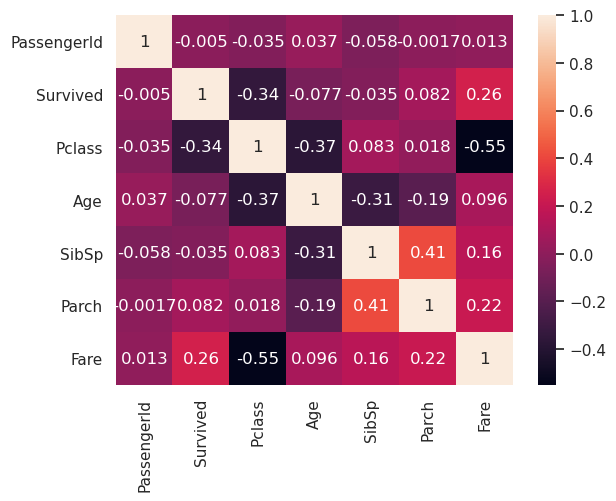

In [ ]:
correlation_mat = df_titanic.corr()
sb.heatmap(correlation_mat, annot=True)
plt.show()

## 5. Normalizar los datos

### 5.1. Convertir valores alfanuméricos a numéricos

In [ ]:
le = preprocessing.LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])

### 5.2. Reemplazar valores nulos por valores de tendencia

In [ ]:
# Hallando el valor de la media
def get_mean(numpy_array, menor, mayor):
    avg_lts = np.array([numpy_array[i] for i in range(len(numpy_array))
                        if menor < numpy_array[i] < mayor])
    return int(stat.mean(avg_lts))

In [ ]:
# Reemplazando los valores nulos
for i in range(len(df_titanic.isnull()['Age'])):
    if df_titanic.isnull()['Age'][i]:
        if df_titanic.Pclass[i] == 1:
            df_titanic.loc[i, 'Age'] = get_mean(edades_primera_clase, 30, 40)
        elif df_titanic.Pclass[i] == 2:
            df_titanic.loc[i, 'Age'] = get_mean(edades_segunda_clase, 30, 40)
        elif df_titanic.Pclass[i] == 3:
            df_titanic.loc[i, 'Age'] = get_mean(edades_tercera_clase, 20, 30)

### 5.3. Eliminando columnas innecesarias

In [ ]:
df_titanic.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked ', 'Fare', 'SibSp', 'Parch'], axis=1,
                inplace=True)
df_titanic.dropna(inplace=True)
print("\nColumnas del modelo: \n", df_titanic.head(10))


Columnas del modelo: 
    Survived  Pclass  Sex   Age
0         0       3    1  22.0
1         1       1    0  38.0
2         1       3    0  26.0
3         1       1    0  35.0
4         0       3    1  35.0
5         0       3    1  26.0
6         0       1    1  54.0
7         0       3    1   2.0
8         1       3    0  27.0
9         1       2    0  14.0


### 5.4. Imprimir valores nulos

In [ ]:
print("\nValores nulos totales: \n", df_titanic.isnull().sum())


Valores nulos totales: 
 Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64


## 6. Gráficas de las variables del dataset

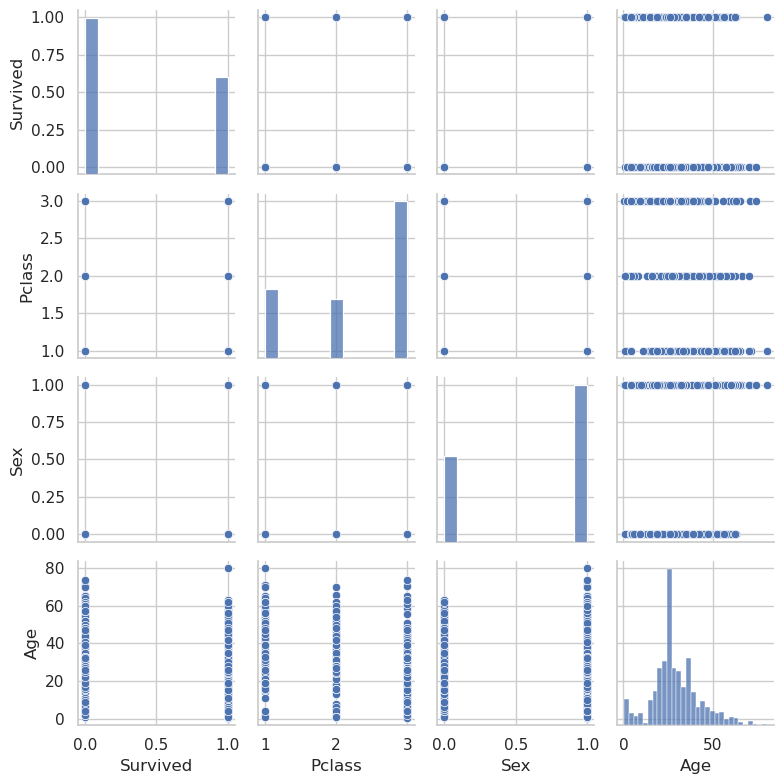

In [ ]:
sb.set(style="whitegrid", context="notebook")
plot_data = df_titanic.columns
sb.pairplot(df_titanic[plot_data], height=2)
plt.tight_layout()
plt.show()

## 7. Separando los datos para el entrenamiento y testeo

In [ ]:
x_axis = df_titanic.drop("Survived", axis=1)
y_axis = df_titanic["Survived"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.3, random_state=10)

## 8. Instanciar modelo de Support Vector Machine

In [ ]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

## 9. Nivel de inferencia y precisión del modelo

In [ ]:
y_prediction = svm.predict(x_test)
inferencia = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
print(f"\nInferencia del modelo: {str(inferencia * 100)}")
print(f"Precisión del modelo: {str(precision * 100)}\n")


Inferencia del modelo: 80.59701492537313
Precisión del modelo: 73.86363636363636

